In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Create Floris input file
# import 
from matplotlib.font_manager import FontProperties

hfont = {'fontname':'Helvetica'}
font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
# font.set_style('italic')


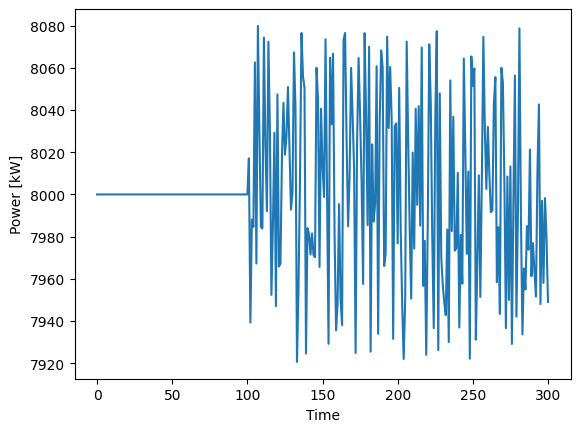

In [ ]:
# Create output file for wind data

power_value = 8000 # in kW
# power_value = 20000 # in kW
Power_reference = power_value*np.ones(203)
time = np.linspace(101.0, 300.0, num=200)
time = np.insert(time, 0, 100.0)
time = np.insert(time, 0,  10.0)
time = np.insert(time, 0, 0.0)
# time[0] = 0.0
# time[1] = 10.0
# time[2] = 100.0

for i in range(3,len(Power_reference)):
    Power_reference[i] = Power_reference[i] + (np.random.rand()-0.5) * power_value * 0.02

plt.figure()
plt.plot(time, Power_reference)
plt.ylabel("Power [kW]")
plt.xlabel("Time")
zipped = np.transpose([time, Power_reference])

# np.savetxt("wind_power_reference_data_08.csv", zipped, fmt='%1.4e', delimiter=',',\
# header="time,wind_power_reference", comments="")




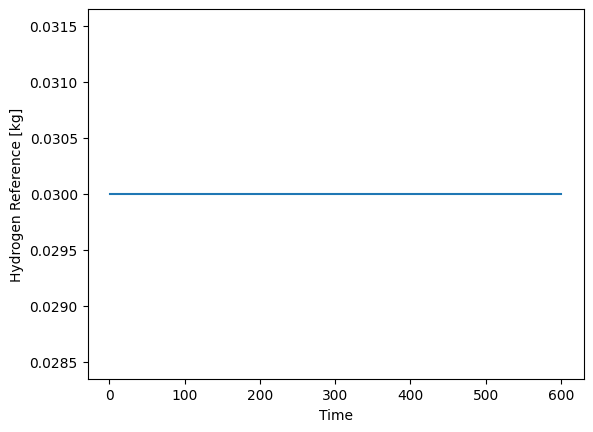

In [ ]:
# External signal for hydrogen reference: Constant value

hydrogen_reference_value = 0.03 # in kg/dt
hydrogen_reference = hydrogen_reference_value*np.ones(600)
time = np.linspace(1.0, 600.0, num=600)


plt.figure()
plt.plot(time, hydrogen_reference)
plt.ylabel("Hydrogen Reference [kg]")
plt.xlabel("Time")
zipped = np.transpose([time, hydrogen_reference])

# np.savetxt("hydrogen_ref_signal.csv", zipped, fmt='%1.4e', delimiter=',',\
# header="time,hydrogen_reference", comments="")


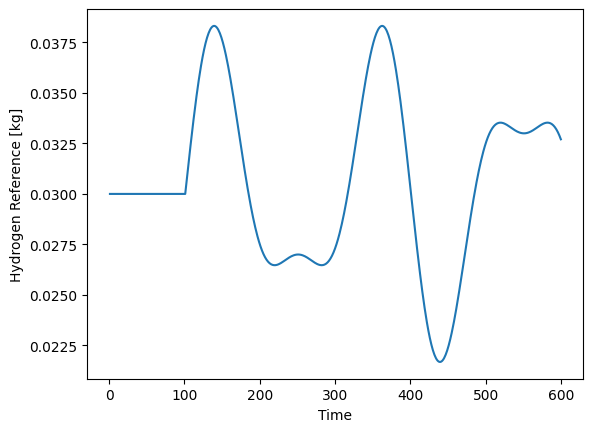

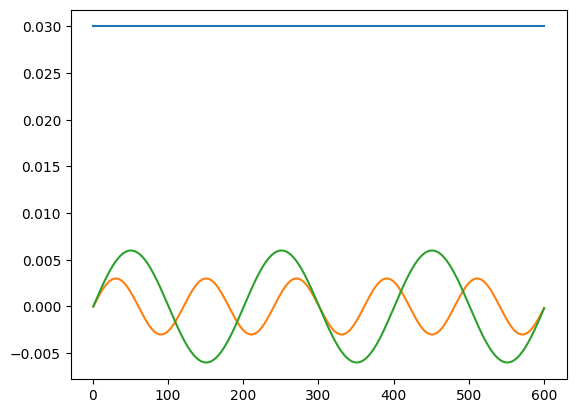

In [ ]:
# External signal for hydrogen reference: Varied signal
signal_length = 600

hydrogen_reference_value = 0.03 # in kg/dt
hydrogen_reference = hydrogen_reference_value*np.ones(signal_length)
time = np.linspace(1.0, signal_length, num=signal_length)

initialization = 100
# sine wave 
cycles = 5
rad = np.pi * 2 * cycles
rad_array = (np.arange(0,rad,rad/signal_length))
amp = 0.1 # amplitude of the wave as a percentage of the reference value

cycles2 = 3
rad2 = np.pi * 2 * cycles2
rad_array2 = (np.arange(0,rad2,rad2/signal_length))
amp2 = 0.2 # amplitude of the wave as a percentage of the reference value

for i in range(initialization,signal_length):
    hydrogen_reference[i] = hydrogen_reference[i] + \
        np.sin(rad_array[i-initialization])*(hydrogen_reference_value*amp) + \
        np.sin(rad_array2[i-initialization])*(hydrogen_reference_value*amp2)

base_signal = hydrogen_reference_value*np.ones(signal_length)
sine1 = np.sin(rad_array)*(hydrogen_reference_value*amp)
sine2 = np.sin(rad_array2)*(hydrogen_reference_value*amp2)

plt.figure()
plt.plot(time, hydrogen_reference)
plt.ylabel("Hydrogen Reference [kg]")
plt.xlabel("Time")
zipped = np.transpose([time, hydrogen_reference])

plt.figure()
plt.plot(time, base_signal)
plt.plot(time, sine1)
plt.plot(time, sine2)

# np.savetxt("hydrogen_ref_signal-sine2.csv", zipped, fmt='%1.4e', delimiter=',',\
# header="time,hydrogen_reference", comments="")